# DISCA with canines dataset

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
from discrimintools.datasets import load_canines
canines = load_canines()
canines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Beauceron to Terre-Neuve
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Taille        27 non-null     object
 1   Poids         27 non-null     object
 2   Velocite      27 non-null     object
 3   Intelligence  27 non-null     object
 4   Affection     27 non-null     object
 5   Agressivite   27 non-null     object
 6   Fonction      27 non-null     object
dtypes: object(7)
memory usage: 1.7+ KB


In [3]:
# Load DISCA
from discrimintools import DISCA
res_disca = DISCA(n_components=2,target=["Fonction"],priors="prop")
res_disca.fit(canines)

DISCA(priors='prop', target=['Fonction'])

In [4]:
from discrimintools import summaryDISCA
summaryDISCA(res_disca)

                     Discriminant Correspondence Analysis - Results                     


Class Level information

           Frequency  Proportion  Prior Probability
Fonction                                           
compagnie         10    0.370370           0.370370
chasse             9    0.333333           0.333333
utilite            8    0.296296           0.296296

Canonical coefficients (the 10 first)

                      Dim.1  Dim.2
Taille_Taille+        0.174 -0.131
Taille_Taille++      -0.191 -0.003
Taille_Taille-        0.284  0.100
Poids_Poids+         -0.045 -0.234
Poids_Poids++        -0.340  0.469
Poids_Poids-          0.291  0.116
Velocite_Veloc+       0.132 -0.221
Velocite_Veloc++     -0.149 -0.064
Velocite_Veloc-       0.028  0.235
Intelligence_Intell+  0.088  0.077

Individuals (the 10 first)

             Dim.1  Dim.2
Chien                    
Beauceron   -0.232  0.060
Basset       0.242  0.296
Berger All  -0.460  0.032
Boxer        0.414 -0.224
Bull-Dog     0

## Individuals informations

### Coordinates

In [5]:
from discrimintools import get_disca_ind
ind = get_disca_ind(res_disca)
ind.keys()

dict_keys(['coord'])

In [6]:
ind["coord"].head(6)

,Dim.1,Dim.2
Chien,,
Beauceron,-0.231936,0.060037
Basset,0.241638,0.295881
Berger All,-0.459741,0.032325
Boxer,0.413511,-0.224446
Bull-Dog,0.990876,0.523040
Bull-Mastif,-0.963955,0.754635


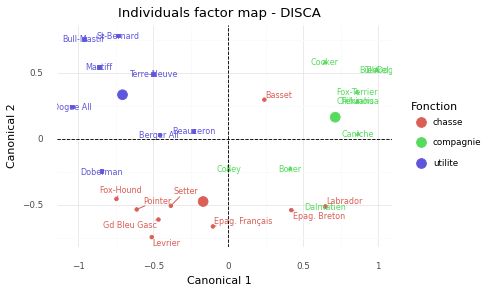

In [7]:
from discrimintools import fviz_disca_ind
p = fviz_disca_ind(res_disca,repel=True)
print(p)

## Variables/categories informations

In [8]:
from discrimintools import get_disca_var
var = get_disca_var(res_disca)
var.keys()

dict_keys(['coord', 'contrib', 'cos2', 'infos'])

### Coordinates

In [9]:
# Coordinates
var["coord"].head(6)

,Dim.1,Dim.2
Taille_Taille+,0.615447,-0.270601
Taille_Taille++,-0.672278,-0.006473
Taille_Taille-,1.000991,0.207157
Poids_Poids+,-0.158972,-0.482984
Poids_Poids++,-1.199302,0.967820
Poids_Poids-,1.027765,0.240335


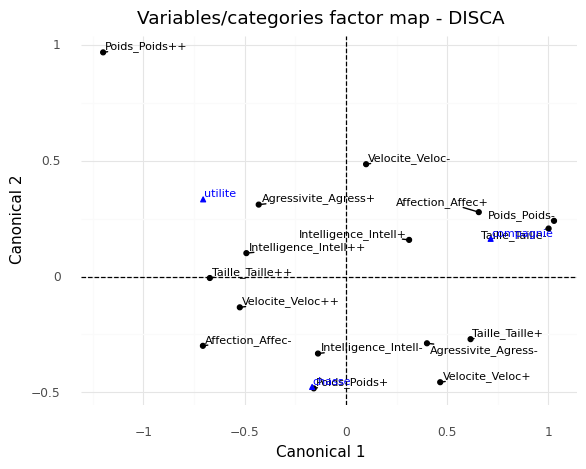

In [10]:
# Variables/categories factor map
from discrimintools import fviz_disca_mod
p = fviz_disca_mod(res_disca,repel=True)
print(p)

### Contributions

In [11]:
# Contributions
var["contrib"].head(6)

,Dim.1,Dim.2
Taille_Taille+,3.380111,1.908012
Taille_Taille++,12.099553,0.003275
Taille_Taille-,12.518107,1.565485
Poids_Poids+,0.631468,17.019410
Poids_Poids++,12.835325,24.406737
Poids_Poids-,15.081961,2.408099


### Square cosinus (Cos2)

In [12]:
# Square cosinus (Cos2)
var["cos2"].head(6)

,Dim.1,Dim.2
Taille_Taille+,0.837997,0.162003
Taille_Taille++,0.999907,0.000093
Taille_Taille-,0.958930,0.041070
Poids_Poids+,0.097748,0.902252
Poids_Poids++,0.605610,0.394390
Poids_Poids-,0.948153,0.051847


### Additionals informations

In [13]:
# Additionals informations
var["infos"].head(6)

,dist,marge,inertia
Taille_Taille+,0.672309,0.030864,0.013951
Taille_Taille++,0.672309,0.092593,0.041852
Taille_Taille-,1.022203,0.043210,0.045150
Poids_Poids+,0.508474,0.086420,0.022343
Poids_Poids++,1.541104,0.030864,0.073302
Poids_Poids-,1.055492,0.049383,0.055015


## Groups/classes

In [14]:
#
from discrimintools import get_disca_classes
classes = get_disca_classes(res_disca)
classes.keys()

dict_keys(['coord', 'contrib', 'cos2', 'infos', 'classes', 'dist2', 'dist'])

### Coordinates

In [15]:
# classes factor coordinates
classes["coord"]

,Dim.1,Dim.2
chasse,-0.167113,-0.476797
compagnie,0.714651,0.162645
utilite,-0.705312,0.333090


### Contributions

In [16]:
# classes contributions
classes["contrib"]

,Dim.1,Dim.2
chasse,2.691509,63.975158
compagnie,54.691459,8.271504
utilite,42.617032,27.753338


### Square cosinus (Cos2)

In [17]:
# Square cosinus (Cos2)
classes["cos2"]

,Dim.1,Dim.2
chasse,0.109405,0.890595
compagnie,0.950755,0.049245
utilite,0.817642,0.182358


### Additionals informations

In [18]:
# Additionals informations
classes["infos"]

,dist,marge,inertia
chasse,0.505235,0.333333,0.085087
compagnie,0.732926,0.370370,0.198956
utilite,0.780009,0.296296,0.180271


### Square distance to origin

In [19]:
# Square distance to origin
classes["dist2"]

,dist2
Fonction,
chasse,0.255262
compagnie,0.537180
utilite,0.608413


### Square distance between groups

In [20]:
# Square distance between groups
classes["dist"]

,chasse,compagnie,utilite
chasse,0.000000,1.186395,0.945574
compagnie,1.186395,0.000000,2.045346
utilite,0.945574,2.045346,0.000000


## Canonical coefficients

In [21]:
# Canonical coefficients
from discrimintools import get_disca_coef
coef = get_disca_coef(res_disca)
coef

,Dim.1,Dim.2
Taille_Taille+,0.174416,-0.131042
Taille_Taille++,-0.190522,-0.003135
Taille_Taille-,0.283679,0.100319
Poids_Poids+,-0.045052,-0.233892
Poids_Poids++,-0.339879,0.468680
Poids_Poids-,0.291266,0.116385
Velocite_Veloc+,0.131925,-0.221016
Velocite_Veloc++,-0.148584,-0.064441
Velocite_Veloc-,0.028185,0.234810
Intelligence_Intell+,0.088418,0.076566


## Anova results

In [22]:
# Squared ratio
res_disca.anova_["eta2"]

Dim.1    0.735104
Dim.2    0.518040
Name: eta2, dtype: float64

In [23]:
# Canonical correlation
res_disca.anova_["canonical_eta2"]

Dim.1    0.857382
Dim.2    0.719750
Name: eta2, dtype: float64

## Correspondence Analysis (CA)

In [24]:
# Correspondence Analysis (CA)
res_ca = res_disca.factor_model_

### Eigenvalues

In [25]:
# Eigenvalues
res_ca.eig_

,eigenvalue,difference,proportion,cumulative
Dim.1,0.345864,0.227414,74.48927,74.48927
Dim.2,0.118450,NaN,25.51073,100.00000
